In [1]:
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import neighbors, linear_model
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as score
import pydot
import os

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

from IPython.display import display, HTML
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# I. Loading the dataset and performing data preprocessing

In [3]:
testData = "dataset/test.csv"

dataA = pd.read_csv(testData, sep = ',' , index_col = 'ID_code')
dfTest = pd.DataFrame(dataA)

dfTest.head(10)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.72

In [4]:
trainData = "dataset/train.csv"
dataB = pd.read_csv(trainData, sep = ',', index_col = 'ID_code')
dfTrain = pd.DataFrame(dataB)

dfTrain.head(10)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.

### We first check for missing values in the dataset. The dataset is complete and there is no missing values

In [5]:
print(dfTest.isnull().sum())
print(dfTest.shape)
dfTest.info()

var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0
var_75     0
var_76     0

In [6]:
print(dfTrain.isnull().sum())
print(dfTrain.shape)
dfTrain.info()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0
var_75     0

In [7]:
dfTrain.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [8]:
dfTest.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000

In [9]:
dfTrain["target"].value_counts()

0    179902
1     20098
Name: target, dtype: int64

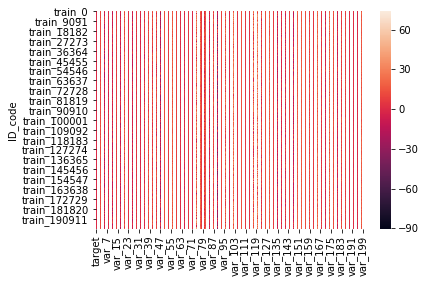

In [11]:
# sns.heatmap(dfTrain)

In [13]:
X = preprocessing.StandardScaler().fit_transform(dfTrain)
X = pd.DataFrame(X)
X.columns = dfTrain.columns
display(X.describe())
display(X.head())

/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.33424,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,0.460091,1.076623,-0.054077,-1.714773,0.561098,-0.009778,-1.401636,-0.229802,-1.395940,2.285292,-0.468989,-0.126734,-0.606166,-1.039947,1.005683,-0.823003,-0.184673,0.479492,-0.768964,0.360340,0.926437,1.162587,-1.299824,0.489773,-0.447275,1.300500,-0.484245,0.897088,-1.396490,0.789254,0.179582,-0.324223,0.509123,1.533101,0.456291,0.265485,-1.889139,-0.164640,0.116264,-1.445719,0.257933,1.907481,0.368029,-1.091818,-0.223968,0.366666,-1.514722,-1.119228,-0.269821,1.386852,0.953771,1.454518,0.593678,-0.281577,1.551733,2.257770,0.010310,1.424133,-1.112326,-0.346204,-0.235063,-0.387918,1.155818,-1.439925,1.671834,0.252319,-1.057511,1.137827,0.587034,-1.683537,1.055809,-0.383475,0.570662,0.230979,-0.310201,0.794207,0.477536,0.902216,-0.282776,-1.525640,-0.372640,-1.355746,-0.393474,-1.040675,1.388299,0.427522,-0.637653,-0.180540,0.589925,-1.431860,1.750971,-0.020872,0.491726,-0.692321,1.624026,2.104318,0.488124,-0.084272,-0.666520,1.355837,-0.910467,0.413522,0.374729,-1.933508,-0.565450,-0.268672,0.090272,-0.039634,-0.922462,1.013930,-0.702227,-0.923810,-0.058680,-1.024974,-0.018613,-1.525514,0.843723,-0.505249,-0.245997,-0.003412,0.686795,-0.407587,1.270955,-0.654603,1.621549,0.970629,0.624732,1.551190,0.355273,1.027749,1.002196,-1.265512,1.243501,-0.363716,0.055578,0.904803,0.486218,-1.776800,0.191144,1.215988,0.689904,0.161129,0.456650,-0.015640,0.707191,0.646555,-1.082956,-1.493440,-0.039210,0.319925,-0.808962,-1.468275,-1.230618,-1.133356,1.749415,-1.323871,-0.711244,0.442890,1.500647,-0.400904,-1.075697,-1.411980,0.122226,0.642079,-0.231051,-1.347890,-0.974846,0.700359,-0.291946,-0.311275,-1.076447,-0.779321,0.261797,1.251424,1.404031,2.086632,0.900016,-0.810464,0.556997,-0.164257,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,-0.33424,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,-0.144987,1.893408,-0.000409,-0.025160,-0.935586,-2.120000,1.757336,-1.473077,-0.948119,2.017368,-1.678317,-1.771135,1.491237,0.668183,-0.954799,0.782756,-1.302434,-0.932390,-0.621140,-1.722433,-0.202250,-1.165592,0.695096,1.063517,-0.118257,-0.599010,0.196242,-0.011334,0.040634,0.741083,-0.530145,-1.250719,-1.932294,0.692012,-1.305067,-1.620194,-1.382515,1.197234,1.730162,1.148358,-1.310794,-0.024833,-0.316814,0.889088,-1.097157,1.028750,0.760624,0.930521,-0.292466,-0.073613,-0.

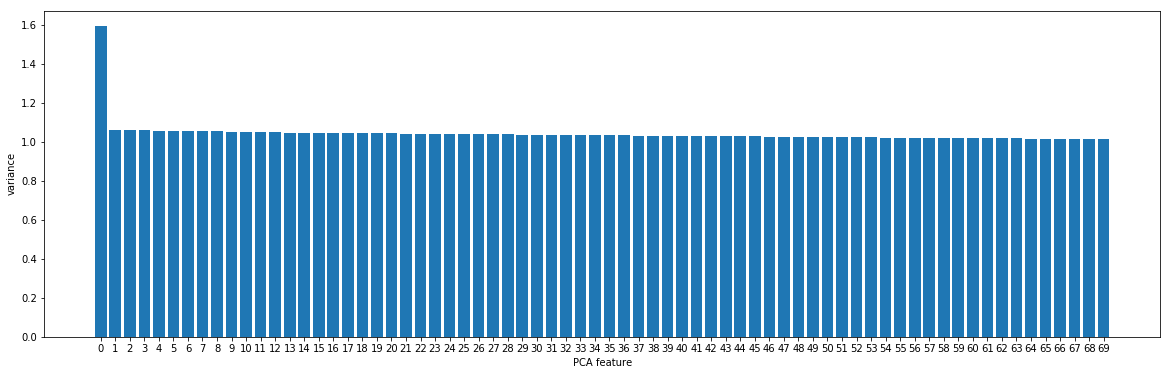

In [14]:
# Create a PCA instance: pca
pca = PCA()

# Fit the data
pca.fit(X)

# Plot the explained variances
n = 70
features = range(pca.n_components_)
fig, ax = plt.subplots(figsize = (20,6))
ax.bar(features[:n], pca.explained_variance_[:n])
ax.set_xlabel('PCA feature')
ax.set_ylabel('variance')
ax.set_xticks(features[:n])
plt.savefig(os.path.join('1-pcafeatures.png'), dpi=300, format='png')
plt.show()
eigen_values = pd.Series(pca.explained_variance_)

0.17965746325925983


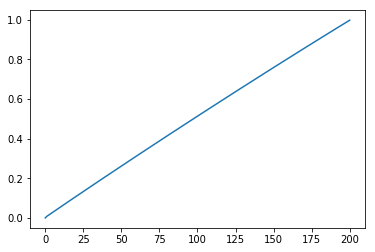

In [15]:
# Determine how many features must be kept to retain 95% of the variance
total_variance = np.sum(eigen_values)
num_pca_features_var_retained = []
for num_components in range(X.shape[1]):
    ratio = np.sum(eigen_values[:num_components]) / total_variance
    num_pca_features_var_retained.append(ratio)

print(num_pca_features_var_retained[34])
plt.plot(num_pca_features_var_retained)

#  II. Testing classifications

# a) Random Forests

In [ ]:
rfc = RandomForestClassifier(random_state=101)
rfc_clf = rfc.fit(dfTrain, y_train)

In [ ]:
rfc_pred = rfc_clf.predict(X_test)

In [ ]:
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

In [227]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

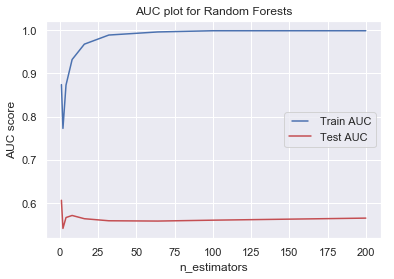

In [228]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=101)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

    
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.title('AUC plot for Random Forests')
plt.savefig(os.path.join('1-3-RandomForests_AUC(n_estimators).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
# Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

The n_estimators in the random forests classifier represents the numsber of trees used in the classifier. Based on the AUC graph above, we see that the highest AUC score for the test data will be around 16 n_estimators. Increasing the n_estimators decreases the test perfomance. 

/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

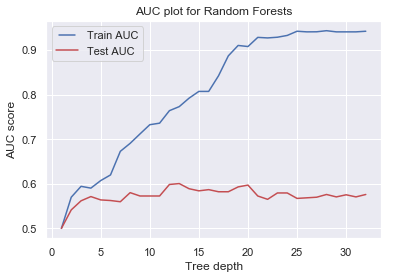

In [229]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=101)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title('AUC plot for Random Forests')
plt.savefig(os.path.join('1-3-RandomForests_AUC(TreeDepth).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
#Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

We see that the higher the tree depth, we get an overfitting case. So a tree depth of 3 wil be chosen

In [230]:
RFC = RandomForestClassifier(n_estimators=16,random_state=101, max_depth=3)
RFC_clf = RFC.fit(X_train, y_train)
RFC_pred = RFC.predict(X_test)


print("Results from the default parameters:")
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
print('\n')
print("Results from the tunned parameters:")
print("Accuracy is ", accuracy_score(y_test,RFC_pred)*100)
print(confusion_matrix(y_test,RFC_pred))
print(classification_report(y_test,RFC_pred))

Results from the default parameters:
Accuracy is  87.98543689320388
[[708  24]
 [ 75  17]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       732
           1       0.41      0.18      0.26        92

   micro avg       0.88      0.88      0.88       824
   macro avg       0.66      0.58      0.60       824
weighted avg       0.85      0.88      0.86       824



Results from the tunned parameters:
Accuracy is  89.56310679611651
[[726   6]
 [ 80  12]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       732
           1       0.67      0.13      0.22        92

   micro avg       0.90      0.90      0.90       824
   macro avg       0.78      0.56      0.58       824
weighted avg       0.87      0.90      0.86       824



# C) Neural Networks (NN)

Data should be normalized before training the neural network model. This is because the NN model might not converge before the max number of iterations allowed. Also, the multi-layer perception is sensitive to scaling the features. (source: https://www.kdnuggets.com/2016/10/beginners-guide-neural-networks-python-scikit-learn.html/2)



In [231]:
scaler = StandardScaler()
scaler.fit(df.drop('y',axis=1))
scaled_features = scaler.transform(df.drop('y',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

X_nn = df_feat.loc[:,]
y_nn = df['y']
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X,y, test_size=0.20,random_state=101)


/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [232]:
y_nn.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [233]:
# Testing with 2 layers with number of neurons:(36,36)
mlp = MLPClassifier(max_iter=1000,random_state=101)

In [234]:
nn_clf = mlp.fit(X_train_nn,y_train_nn)

predicting and evaluating

In [235]:
predictions = nn_clf.predict(X_test_nn)

In [236]:
print("Accuracy is ", accuracy_score(y_test_nn,predictions)*100)
print(confusion_matrix(y_test_nn,predictions))
print("\n")
print(classification_report(y_test_nn,predictions))

Accuracy is  85.55825242718447
[[682  50]
 [ 69  23]]


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       732
           1       0.32      0.25      0.28        92

   micro avg       0.86      0.86      0.86       824
   macro avg       0.61      0.59      0.60       824
weighted avg       0.84      0.86      0.85       824



Tunning the NN parameters using the GridSearchCV method.

In [44]:
parameter_space = {
    'max_iter': [2000],
    'hidden_layer_sizes': [(48), (48,48), (48,48,48,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'random_state': [101],
}

In [45]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, refit=True)

In [46]:
clf.fit(X_train_nn, y_train_nn)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=101, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_iter': [2000], 'hidden_layer_sizes': [48, (48, 48), (48, 48, 48, 10)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam', 'lbfgs'], 'alpha': [0.0001, 0.05], 'random_state': [101]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (48, 48), 'max_iter': 2000, 'random_state': 101, 'solver': 'sgd'}


In [240]:
clf.best_params_['hidden_layer_sizes']
# mlp_nn = MLPClassifier(activation = 'tanh',
#                        alpha = 0.0001,
# #                        learning_rate= clf.best_params_['learning_rate'], 
#                        solver = 'sgd',
#                        random_state= 101,
#                        hidden_layer_sizes= (48, 48), 
#                        max_iter= 2000)

In [237]:
mlp_nn = MLPClassifier(activation = clf.best_params_['activation'],
                       alpha = clf.best_params_['alpha'], 
#                        learning_rate= clf.best_params_['learning_rate'], 
                       solver = clf.best_params_['solver'], 
                       random_state= clf.best_params_['random_state'], 
                       hidden_layer_sizes= clf.best_params_['hidden_layer_sizes'], 
                       max_iter= clf.best_params_['max_iter'])

AttributeError: 'MLPClassifier' object has no attribute 'best_params_'

In [242]:
mlp_nn.fit(X_train_nn, y_train_nn)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(48, 48), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=101, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [243]:
y_true, y_pred = y_test_nn , mlp_nn.predict(X_test_nn)

print("Results from the default parameters:")
print("Accuracy is ", accuracy_score(y_test_nn,predictions)*100)
print(confusion_matrix(y_test_nn,predictions))
print(classification_report(y_test_nn,predictions))
print("\n")
print("Results from the tunned parameters:")
print("Accuracy is ", accuracy_score(y_true,y_pred)*100)
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))

Results from the default parameters:
Accuracy is  85.55825242718447
[[682  50]
 [ 69  23]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       732
           1       0.32      0.25      0.28        92

   micro avg       0.86      0.86      0.86       824
   macro avg       0.61      0.59      0.60       824
weighted avg       0.84      0.86      0.85       824



Results from the tunned parameters:
Accuracy is  89.32038834951457
[[716  16]
 [ 72  20]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       732
           1       0.56      0.22      0.31        92

   micro avg       0.89      0.89      0.89       824
   macro avg       0.73      0.60      0.63       824
weighted avg       0.87      0.89      0.87       824



# IV. Creating plots of the models on the test data

# Plotting best two features

Normalized Data for Neural Network:

In [244]:
X_testnn_df =pd.DataFrame(X_test_nn, columns=df.columns[:-1]) 
y_testnn_df = pd.DataFrame(y_test_nn, columns = ['y'])
X_testnn_df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_lt_2week,pdays_lt_3weeks,pdays_never,poutcome_nonexistent,poutcome_success
3489,-0.883778,0.180203,1.494607,-1.206054,-0.871264,-1.436846,-1.243440,-0.914779,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,2.227314,-0.166417,0.801056,-0.623489,-0.242068,-0.402391,-0.536649,-0.015583,2.588255,-0.665381,-1.057746,-0.438783,-0.743752,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,-2.431270,-0.188958
1380,0.473849,-0.209228,-0.351356,0.841389,1.528273,-0.283172,0.772851,0.836535,1.912983,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,0.801056,-0.623489,-0.242068,-0.402391,-0.536649,-0.015583,-0.386361,-0.665381,-1.057746,2.279032,1.344534,-0.427319,-0.073279,-0.456757,2.602249,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,1.974270,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
1183,-0.592858,-0.209228,1.494607,-0.118350,-0.655478,-0.326707,0.287672,0.398028,-0.522744,-0.193055,-0.165645,3.422421,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,0.945406,2.279032,-0.743752,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,2.869743,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,2.044782,-0.069852,-0.046795,-4.974309,-2.431270,5.292168
1320,1.734503,0.180203,-0.351356,0.649441,0.715193,0.892269,0.712852,0.332862,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,-0.536649,-0.015583,-0.386361,1.502898,-1.057746,-0.438783,1.344534,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,1.410360,-0.348463,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
74,-0.883778,-0.598660,-0.351356,0.841389,-0.234264,0.957571,0.775735,0.836535,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,2.227314,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,0.945406,2.279032,-0.743752,2.340174,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,1.974270,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958


In [245]:
X_test_df =pd.DataFrame(X_test, columns=df.columns[:-1]) 
y_test_df = pd.DataFrame(y_test, columns = ['y'])
X_test_df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_lt_2week,pdays_lt_3weeks,pdays_never,poutcome_nonexistent,poutcome_success
3489,-0.883778,0.180203,1.494607,-1.206054,-0.871264,-1.436846,-1.243440,-0.914779,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,2.227314,-0.166417,0.801056,-0.623489,-0.242068,-0.402391,-0.536649,-0.015583,2.588255,-0.665381,-1.057746,-0.438783,-0.743752,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,-2.431270,-0.188958
1380,0.473849,-0.209228,-0.351356,0.841389,1.528273,-0.283172,0.772851,0.836535,1.912983,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,0.801056,-0.623489,-0.242068,-0.402391,-0.536649,-0.015583,-0.386361,-0.665381,-1.057746,2.279032,1.344534,-0.427319,-0.073279,-0.456757,2.602249,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,1.974270,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
1183,-0.592858,-0.209228,1.494607,-0.118350,-0.655478,-0.326707,0.287672,0.398028,-0.522744,-0.193055,-0.165645,3.422421,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,0.945406,2.279032,-0.743752,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,2.869743,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,2.044782,-0.069852,-0.046795,-4.974309,-2.431270,5.292168
1320,1.734503,0.180203,-0.351356,0.649441,0.715193,0.892269,0.712852,0.332862,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,-0.536649,-0.015583,-0.386361,1.502898,-1.057746,-0.438783,1.344534,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,1.410360,-0.348463,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958
74,-0.883778,-0.598660,-0.351356,0.841389,-0.234264,0.957571,0.775735,0.836535,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,2.227314,-0.166417,-1.248353,1.603876,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,0.945406,2.279032,-0.743752,2.340174,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,1.974270,-0.489050,-0.069852,-0.046795,0.201033,0.411308,-0.188958


In [246]:
list(zip(X_test_df.columns, dt_clf.feature_importances_))

[('age', 0.019640416884951883),
 ('campaign', 0.0),
 ('previous', 0.0),
 ('emp.var.rate', 0.0),
 ('cons.price.idx', 0.0),
 ('cons.conf.idx', 0.04866353342763606),
 ('euribor3m', 0.050217510470925326),
 ('nr.employed', 0.7037883024653813),
 ('job_blue-collar', 0.0),
 ('job_entrepreneur', 0.0),
 ('job_housemaid', 0.0),
 ('job_management', 0.0),
 ('job_retired', 0.0),
 ('job_self-employed', 0.0),
 ('job_services', 0.0),
 ('job_student', 0.0),
 ('job_technician', 0.0),
 ('job_unemployed', 0.0),
 ('marital_married', 0.0),
 ('marital_single', 0.0),
 ('education_basic.6y', 0.0),
 ('education_basic.9y', 0.0),
 ('education_high.school', 0.0),
 ('education_illiterate', 0.0),
 ('education_professional.course', 0.0),
 ('education_university.degree', 0.0),
 ('housing_yes', 0.0),
 ('loan_yes', 0.0),
 ('contact_telephone', 0.04187712374601215),
 ('month_aug', 0.0),
 ('month_dec', 0.0),
 ('month_jul', 0.0),
 ('month_jun', 0.0),
 ('month_mar', 0.0),
 ('month_may', 0.0),
 ('month_nov', 0.0),
 ('month_oc

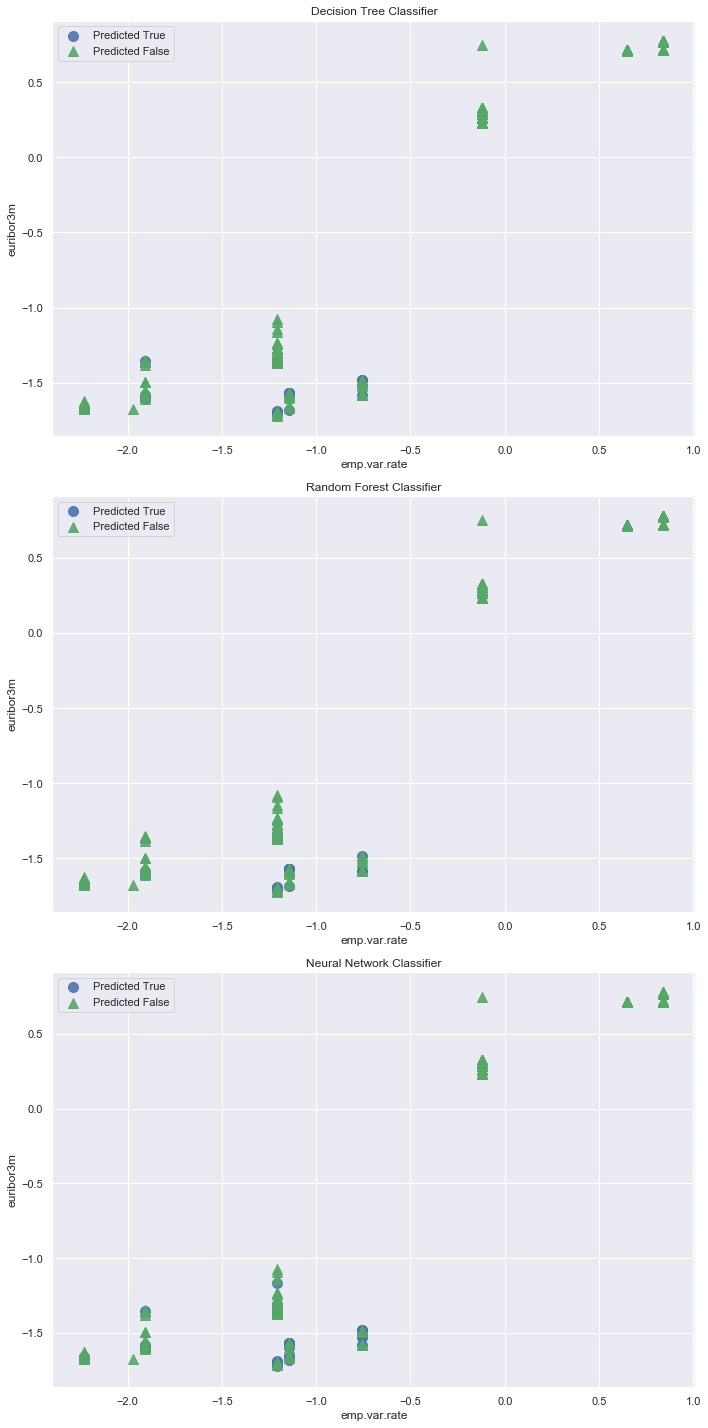

In [247]:
true_predictions = X_test[RFC_pred == 1]
false_predictions = X_test[RFC_pred == 0]

plt.figure(figsize=(10, 20))
size = 100
alpha=0.9
x_feature = 'emp.var.rate'
y_feature = 'euribor3m'


true_predictions = X_test[y_pred_dt == 1]
false_predictions = X_test[y_pred_dt == 0]
ax = plt.subplot(3, 1, 1)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Decision Tree Classifier')
ax.legend(['Predicted True', 'Predicted False'])

true_predictions = X_test[RFC_pred == 1]
false_predictions = X_test[RFC_pred == 0]
ax = plt.subplot(3, 1, 2)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Random Forest Classifier')
ax.legend(['Predicted True', 'Predicted False'])

true_predictions = X_test[y_pred == 1]
false_predictions = X_test[y_pred == 0]
ax = plt.subplot(3, 1, 3)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Neural Network Classifier')
ax.legend(['Predicted True', 'Predicted False'])

plt.tight_layout()
plt.savefig(os.path.join('1-4- eur and emp features.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


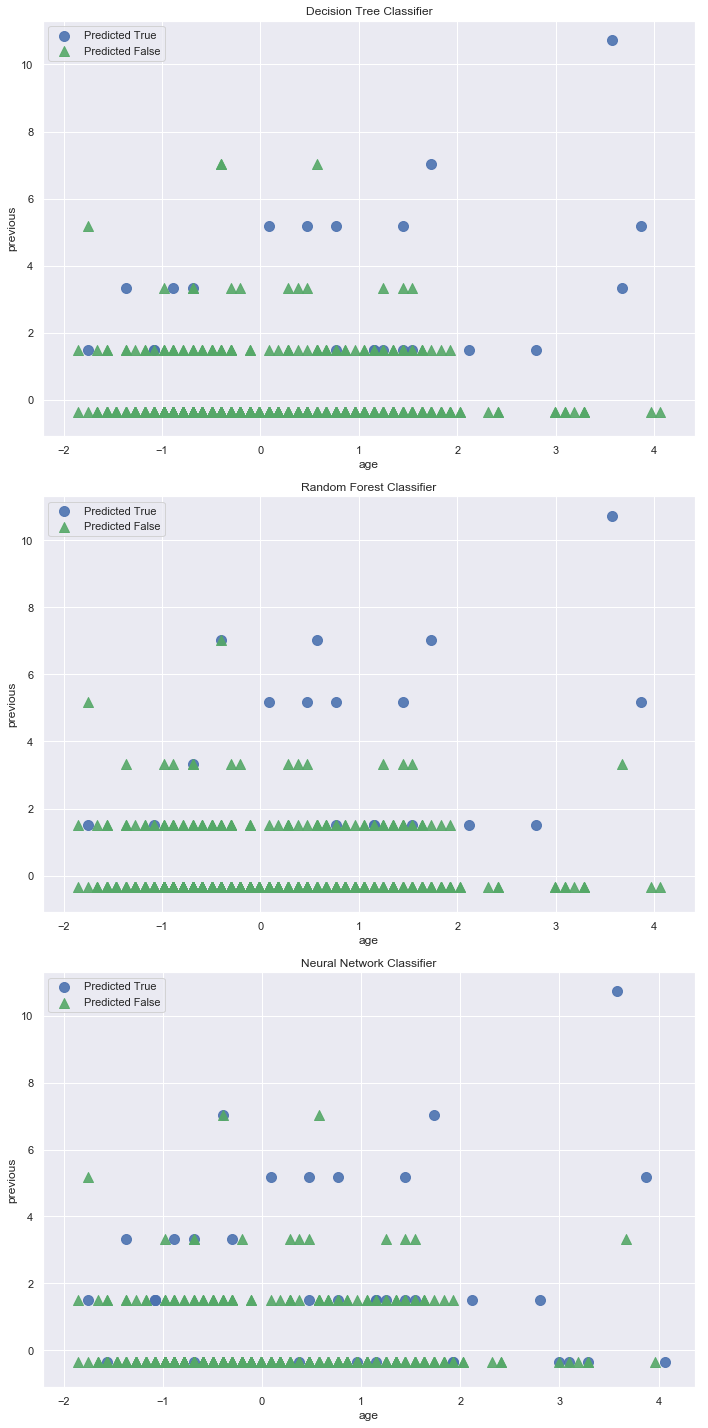

In [56]:
true_predictions = X_test[RFC_pred == 1]
false_predictions = X_test[RFC_pred == 0]

plt.figure(figsize=(10, 20))
size = 100
alpha=0.9
x_feature = 'age'
y_feature = 'previous'


true_predictions = X_test[y_pred_dt == 1]
false_predictions = X_test[y_pred_dt == 0]
ax = plt.subplot(3, 1, 1)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Decision Tree Classifier')
ax.legend(['Predicted True', 'Predicted False'])

true_predictions = X_test[RFC_pred == 1]
false_predictions = X_test[RFC_pred == 0]
ax = plt.subplot(3, 1, 2)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Random Forest Classifier')
ax.legend(['Predicted True', 'Predicted False'])

true_predictions = X_test[y_pred == 1]
false_predictions = X_test[y_pred == 0]
ax = plt.subplot(3, 1, 3)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Neural Network Classifier')
ax.legend(['Predicted True', 'Predicted False'])

plt.tight_layout()
plt.savefig(os.path.join('1-4-age and previous features.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


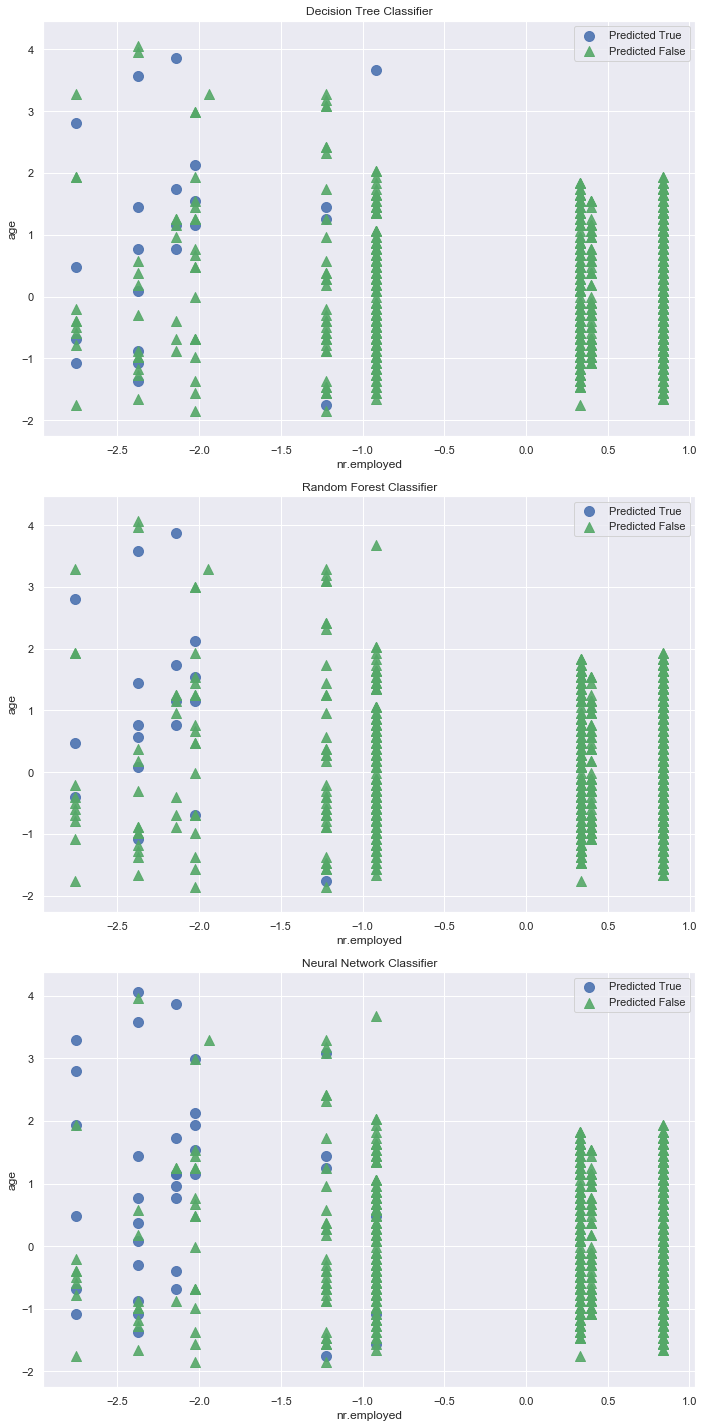

In [248]:
true_predictions = X_test[RFC_pred == 1]
false_predictions = X_test[RFC_pred == 0]

plt.figure(figsize=(10, 20))
size = 100
alpha=0.9
x_feature = 'nr.employed'
y_feature = 'age'


true_predictions = X_test[y_pred_dt == 1]
false_predictions = X_test[y_pred_dt == 0]
ax = plt.subplot(3, 1, 1)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Decision Tree Classifier')
ax.legend(['Predicted True', 'Predicted False'])

true_predictions = X_test[RFC_pred == 1]
false_predictions = X_test[RFC_pred == 0]
ax = plt.subplot(3, 1, 2)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Random Forest Classifier')
ax.legend(['Predicted True', 'Predicted False'])

true_predictions = X_test[y_pred == 1]
false_predictions = X_test[y_pred == 0]
ax = plt.subplot(3, 1, 3)
ax.scatter(true_predictions[x_feature], true_predictions[y_feature], marker='o', color='b', s=size, label='True', alpha=alpha)
ax.scatter(false_predictions[x_feature], false_predictions[y_feature], marker='^', color='g', s=size, label='False', alpha=alpha )
ax.set_ylabel(y_feature) 
ax.set_xlabel(x_feature)
ax.set_title('Neural Network Classifier')
ax.legend(['Predicted True', 'Predicted False'])

plt.tight_layout()
plt.savefig(os.path.join('1-4-age and nremployed features.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


### Neural Network Classifier Run Kfold for 4,5,6,7 folds 20 times each
**DEFAULT PARAMETERS**

In [249]:
np.random.seed(40)
nn_mlp = MLPClassifier(random_state=42)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, nn_mlp, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

Testing model MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
1

AttributeError: 'builtin_function_or_method' object has no attribute 'time'

In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Third classifier: Results from random forests(default parameters)")
data.groupby(['num_folds']).agg(f)

In [ ]:
X = X_testnn_df.iloc[:, ]
X = X[['age','nr.employed']]
y= y_testnn_df['y']


label = ['Neural Network']
clf_list = [mlp_nn]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

X = X.values
y = y.values


for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
    plt.xlabel('pdays')
    plt.ylabel('nr.employed')
    plt.savefig(os.path.join('1-4-NN_(pdaysVsnr.employed).png'), dpi=300, format='png', bbox_inches='tight')



    
plt.show()

In [ ]:
X = X_test_df.iloc[:, ]
X = X[['nr.employed','euribor3m']]
y= y_test_df['y']



label = ['Decision Tree', 'Random Forests']
clf_list = [clf_gini, RFC]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

X = X.values
y = y.values

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
    plt.xlabel('nr.employed')
    plt.ylabel('euribor3m')
    plt.savefig(os.path.join('1-4-dT_RF_(euribor3mVSnr.employed).png'), dpi=300, format='png', bbox_inches='tight')



plt.show()

In [ ]:
X = X_testnn_df.iloc[:, ]
X = X[['nr.employed','euribor3m']]
y= y_testnn_df['y']


label = ['Neural Network']
clf_list = [mlp_nn]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

X = X.values
y = y.values


for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
    plt.xlabel('nr.employed')
    plt.ylabel('euribor3m')
    plt.savefig(os.path.join('1-4-NN_(euribor3mVSnr.employed).png'), dpi=300, format='png', bbox_inches='tight')



    
plt.show()

In [ ]:
X = X_test_df.iloc[:, ]
X = X[['age','euribor3m']]
y= y_test_df['y']


label = ['Decision Tree', 'Random Forests']
clf_list = [clf_gini, RFC]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

X = X.values
y = y.values


for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
    plt.xlabel('pdays')
    plt.ylabel('euribor3m')
    plt.savefig(os.path.join('1-4-dT_RF_(pdaysVSeuribor3m).png'), dpi=300, format='png', bbox_inches='tight')



plt.show()

In [ ]:
X = X_testnn_df.iloc[:, ]
X = X[['age','euribor3m']]
y= y_testnn_df['y']


label = ['Neural Network']
clf_list = [mlp_nn]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

X = X.values
y = y.values


for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
    plt.xlabel('pdays')
    plt.ylabel('euribor3m')
    plt.savefig(os.path.join('1-4-NN_(pdaysVSeuribor3m).png'), dpi=300, format='png', bbox_inches='tight')


    
plt.show()

# V. Produce a table with the true/false positive/negative metrics as well as accuracies

In [250]:
print("Classification Report for Decision Tree:")
print("Accuracy is ", accuracy_score(y_test,y_pred_dt)*100)
print(confusion_matrix(y_test,y_pred_dt))
print('\n')
print(classification_report(y_test,y_pred_dt))

print("Classification Report for Random Forests:")
print("Accuracy is ", accuracy_score(y_test,RFC_pred)*100)
print(confusion_matrix(y_test,RFC_pred))
print(classification_report(y_test,RFC_pred))


print("Classification Report for Neural Network:")
print("Accuracy is ", accuracy_score(y_true,y_pred)*100)
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))

Classification Report for Decision Tree:
Accuracy is  89.56310679611651
[[724   8]
 [ 78  14]]


              precision    recall  f1-score   support

           0       0.90      0.99      0.94       732
           1       0.64      0.15      0.25        92

   micro avg       0.90      0.90      0.90       824
   macro avg       0.77      0.57      0.59       824
weighted avg       0.87      0.90      0.87       824

Classification Report for Random Forests:
Accuracy is  89.56310679611651
[[726   6]
 [ 80  12]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       732
           1       0.67      0.13      0.22        92

   micro avg       0.90      0.90      0.90       824
   macro avg       0.78      0.56      0.58       824
weighted avg       0.87      0.90      0.86       824

Classification Report for Neural Network:
Accuracy is  89.32038834951457
[[716  16]
 [ 72  20]]
              precision    recall  f1-score   support

  

In [251]:
algorithms = ('Decision Tree', 'Random Forest', 'Neural Network')
ind = ['Accuracies (%)', 'True Positive', 'False Positive', 'False Negative', 'True Negative']
accuracies = [accuracy_score(y_test,y_pred_dt)*100,accuracy_score(y_test,RFC_pred)*100,accuracy_score(y_true,y_pred)*100]
true_negative = [confusion_matrix(y_test,y_pred_dt)[0][0], confusion_matrix(y_test,RFC_pred)[0][0],confusion_matrix(y_true,y_pred)[0][0]]
false_negative = [confusion_matrix(y_test,y_pred_dt)[0][1],confusion_matrix(y_test,RFC_pred)[0][1], confusion_matrix(y_true,y_pred)[0][1]]
false_positive = [confusion_matrix(y_test,y_pred_dt)[1][0],confusion_matrix(y_test,RFC_pred)[1][0],confusion_matrix(y_true,y_pred)[1][0]]
true_positive = [confusion_matrix(y_test,y_pred_dt)[1][1],confusion_matrix(y_test,RFC_pred)[1][1],confusion_matrix(y_true,y_pred)[1][1]]

arr1 = np.array([accuracies, true_positive,false_positive,false_negative,true_negative]) 
table_1 = pd.DataFrame(arr1, index = ind, columns = algorithms)

table_1

,Decision Tree,Random Forest,Neural Network
Accuracies (%),89.563107,89.563107,89.320388
True Positive,14.000000,12.000000,20.000000
False Positive,78.000000,80.000000,72.000000
False Negative,8.000000,6.000000,16.000000
True Negative,724.000000,726.000000,716.000000


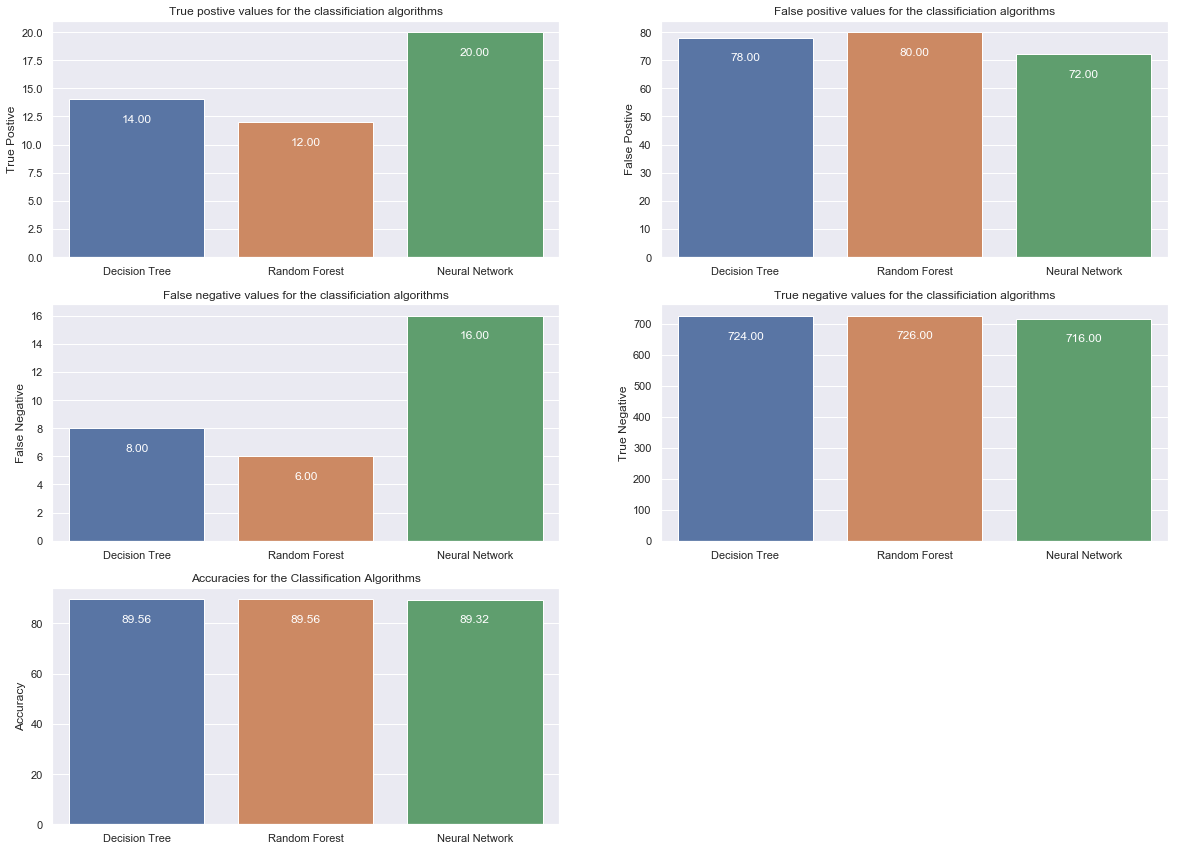

In [252]:
sns.set()
plt.figure(figsize=(20, 20))
# plot True positives

algorithms = ('Decision Tree', 'Random Forest', 'Neural Network')
x_axis = np.arange(len(algorithms))
dt_trueP = confusion_matrix(y_test,y_pred_dt)[1][1]
rf_trueP = confusion_matrix(y_test,RFC_pred)[1][1]
nn_trueP = confusion_matrix(y_true,y_pred)[1][1]
trueP = [dt_trueP,rf_trueP,nn_trueP]
 

plt.subplot(4, 2, 1) 
ax = sns.barplot(x_axis,trueP)
ax.set(ylabel ='True Postive', title='True postive values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white',  xytext=(0, -20), textcoords='offset points') 

# plot False pOsitives
dt_falseP = confusion_matrix(y_test,y_pred_dt)[1][0]
rf_falseP = confusion_matrix(y_test,RFC_pred)[1][0]
nn_falseP = confusion_matrix(y_true,y_pred)[1][0]
falseP = [dt_falseP,rf_falseP,nn_falseP]
 
plt.subplot(4, 2, 2)
ax = sns.barplot(x_axis,falseP)
ax.set(ylabel ='False Postive', title='False positive values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points') 

# plot False Negatives
dt_falseN = confusion_matrix(y_test,y_pred_dt)[0][1]
rf_falseN = confusion_matrix(y_test,RFC_pred)[0][1]
nn_falseN = confusion_matrix(y_true,y_pred)[0][1]
falseN = [dt_falseN,rf_falseN,nn_falseN]
 
plt.subplot(4, 2, 3)
ax = sns.barplot(x_axis,falseN)
ax.set(ylabel ='False Negative', title='False negative values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points')


# plot True Negatives

dt_trueN = confusion_matrix(y_test,y_pred_dt)[0][0]
rf_trueN = confusion_matrix(y_test,RFC_pred)[0][0]
nn_trueN = confusion_matrix(y_true,y_pred)[0][0]
trueN = [dt_trueN,rf_trueN,nn_trueN]

plt.subplot(4, 2, 4) 
ax = sns.barplot(x_axis,trueN)
ax.set(ylabel ='True Negative', title='True negative values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points')



# plot Accurcacy
dt_accuracy = accuracy_score(y_test,y_pred_dt)*100
rf_accuracy = accuracy_score(y_test,RFC_pred)*100
nn_accuracy = accuracy_score(y_true,y_pred)*100
performance = [dt_accuracy,rf_accuracy,nn_accuracy]
 

 

plt.subplot(4, 2, 5)
ax = sns.barplot(x_axis,performance)
ax.set(ylabel ='Accuracy', title='Accuracies for the Classification Algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white', xytext=(0, -20), textcoords='offset points')
        
plt.savefig(os.path.join('barcharts_algorithms.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()





### 1. Handling imbalanced data using Up-sample Minority Class

In [62]:
# https://elitedatascience.com/imbalanced-classes
from sklearn.utils import resample
# Separate majority and minority classes
df1_majority = df[df['y']==0]
df1_minority = df[df['y']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df1_minority, replace=True, n_samples=3668, random_state=99)     
# replace=True as it is sample with replacement
# n_samples is the target number of samples after the Up-sampling to match majority class
# random_state=99 for reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df1_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['y'].value_counts() 
# The new df has more observations than the original, and the ratio of the two classes is now 1:1
# 3668 observations for both classe

#print( np.unique(y_pred_dt ) )

1    3668
0    3668
Name: y, dtype: int64

### Train Test Split with the new Upsampled Dataframe

In [63]:
X_up = df_upsampled.drop('y',axis=1)
y_up = df_upsampled['y']
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up,y_up, test_size=0.20,random_state=101)

#Normalize the upsampled data and then split for NN
scaler = StandardScaler()
scaler.fit(df_upsampled.drop('y',axis=1))
scaled_features_up = scaler.transform(df_upsampled.drop('y',axis=1))

df_feat_up = pd.DataFrame(scaled_features_up,columns=df_upsampled.columns[:-1])

X_nn_up = df_feat_up.loc[:,]
y_nn_up = df_upsampled['y']
X_train_nn_up, X_test_nn_up, y_train_nn_up, y_test_nn_up = train_test_split(X_nn_up,y_nn_up, test_size=0.20,random_state=101)

C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Richard\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


### Training/Testing Decision Trees, Random Forests, and Neural Networks

In [64]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_up,y_train_up)  
dtree_pred = dtree.predict(X_test_up)

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train_up, y_train_up)
rfc_pred = rfc.predict(X_test_up)

clf_up =MLPClassifier(max_iter=1000,random_state=101)
clf_up.fit(X_train_nn_up, y_train_nn_up)
clf_pred = clf_up.predict(X_test_nn_up)

### Checking accurancy change after Up-sample Minority Class

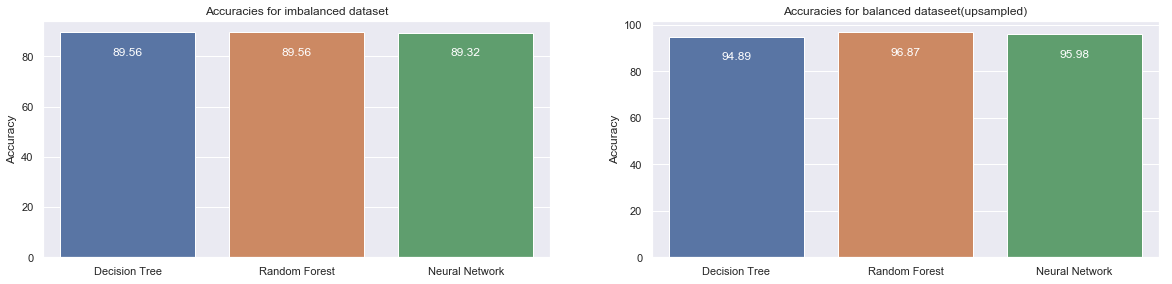

In [65]:
sns.set()
plt.figure(figsize=(20, 20))
# plot True positives

algorithms = ('Decision Tree', 'Random Forest', 'Neural Network')
x_axis = np.arange(len(algorithms))
# accuracy before up-sample

dt_accuracy = accuracy_score(y_test,y_pred_dt)*100
rf_accuracy = accuracy_score(y_test,RFC_pred)*100
nn_accuracy = accuracy_score(y_true,y_pred)*100
performance = [dt_accuracy,rf_accuracy,nn_accuracy]
 
plt.subplot(4, 2, 1)
ax = sns.barplot(x_axis,performance)
ax.set(ylabel ='Accuracy', title='Accuracies for imbalanced dataset',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white', xytext=(0, -20), textcoords='offset points')

# plot Accurcacy after upsample
dt_accuracy_up = accuracy_score(y_test_up,dtree_pred)*100
rf_accuracy_up = accuracy_score(y_test_up,rfc_pred)*100
nn_accuracy_up = accuracy_score(y_test_up,clf_pred)*100
performance = [dt_accuracy_up,rf_accuracy_up,nn_accuracy_up]
plt.subplot(4, 2, 2)
ax = sns.barplot(x_axis,performance)
ax.set(ylabel ='Accuracy', title='Accuracies for balanced dataseet(upsampled)',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white', xytext=(0, -20), textcoords='offset points')

### 2. Handling imbalanced data using down-sample Minority Class

In [66]:
# Separate majority and minority classes
df2_majority = df[df['y']==0]
df2_minority = df[df['y']==1]
 
# Downsample majority class
df2_majority_downsampled = resample(df2_majority, replace=False, n_samples=451, random_state=99)   
# replace=False sample without replacement, n_samples=49,     
# n_samples is the target number of samples after the Down-sampling to match minority class            
# random_state=99 for reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df2_majority_downsampled, df2_minority])
 
# Display new class counts
df_downsampled['y'].value_counts()
# The new df has less observations than the original, and the ratio of the two classes is now 1:1
# 451 observations for both classes

1    451
0    451
Name: y, dtype: int64

### Train Test Split with the new downsampled Dataframe

In [67]:
X_dn = df_downsampled.drop('y',axis=1)
y_dn = df_downsampled['y']
X_train_dn, X_test_dn, y_train_dn, y_test_dn = train_test_split(X_dn,y_dn, test_size=0.20,random_state=101)

#Normalize the upsampled data and then split for NN
scaler = StandardScaler()
scaler.fit(df_downsampled.drop('y',axis=1))
scaled_features_dn = scaler.transform(df_downsampled.drop('y',axis=1))

df_feat_dn = pd.DataFrame(scaled_features_dn,columns=df_downsampled.columns[:-1])

X_nn_dn = df_feat_dn.loc[:,]
y_nn_dn = df_downsampled['y']
X_train_nn_dn, X_test_nn_dn, y_train_nn_dn, y_test_nn_dn = train_test_split(X_nn_dn,y_nn_dn, test_size=0.20,random_state=101)

C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Richard\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


### Training/Testing Decision Trees, Random Forests, and Neural Networks

In [68]:
#using already tuned DT
dtree_dn = clf_gini.fit(X_train_dn, y_train_dn)
dtree_pred_dn = dtree_dn.predict(X_test_dn)
#USING ALREADY TUNED RFC
rfc_dn= RFC.fit(X_train_dn, y_train_dn)
rfc_pred_dn = rfc_dn.predict(X_test_dn)
# used default parameters for NN
mlp_dn = MLPClassifier(max_iter=1000,random_state=101)
clf_dn = mlp_dn.fit(X_train_nn_dn,y_train_nn_dn)
clf_pred_dn = clf_dn.predict(X_test_nn_dn)

### Checking accurancy change after downsample Minority Class

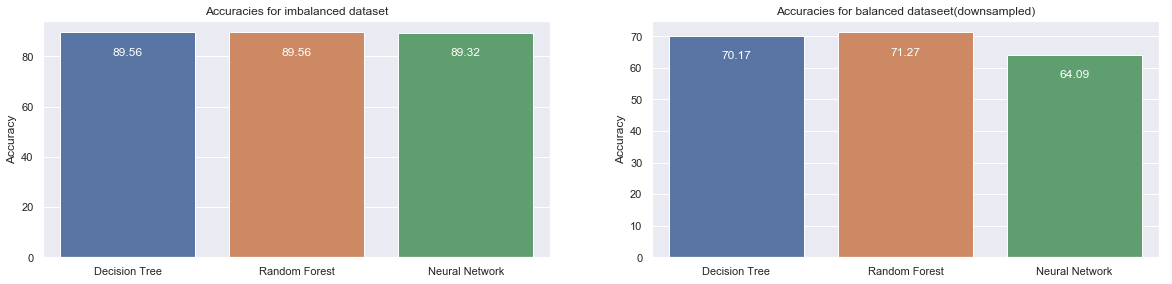

In [69]:
sns.set()
plt.figure(figsize=(20, 20))
# plot True positives

algorithms = ('Decision Tree', 'Random Forest', 'Neural Network')
x_axis = np.arange(len(algorithms))
# accuracy before up-sample

dt_accuracy = accuracy_score(y_test,y_pred_dt)*100
rf_accuracy = accuracy_score(y_test,RFC_pred)*100
nn_accuracy = accuracy_score(y_true,y_pred)*100
performance = [dt_accuracy,rf_accuracy,nn_accuracy]
 
plt.subplot(4, 2, 1)
ax = sns.barplot(x_axis,performance)
ax.set(ylabel ='Accuracy', title='Accuracies for imbalanced dataset',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white', xytext=(0, -20), textcoords='offset points')

# plot Accurcacy after upsample
dt_accuracy_up = accuracy_score(y_test_dn,dtree_pred_dn)*100
rf_accuracy_up = accuracy_score(y_test_dn,rfc_pred_dn)*100
nn_accuracy_up = accuracy_score(y_test_nn_dn,clf_pred_dn)*100
performance = [dt_accuracy_up,rf_accuracy_up,nn_accuracy_up]
plt.subplot(4, 2, 2)
ax = sns.barplot(x_axis,performance)
ax.set(ylabel ='Accuracy', title='Accuracies for balanced dataseet(downsampled)',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white', xytext=(0, -20), textcoords='offset points')

# Question 2: Parameter Selection and Classification (for dataset B)

# 1. Data loading and preprocessing using the Z-score normalization 

In [253]:
dataB = pd.read_csv('DataDNA.csv', sep = ',', header= None)
df2 = pd.DataFrame(dataB)
print(df2.shape)
df2.head(10)

(2200, 58)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,1,2,1,2,1,2,3,3,3,3,1,2,1,3,4,2,1,2,2,2,1,1,2,3,1,4,2,2,1,4,2,2,1,4,2,2,1,2,1,1,2,2,1,4,2,3,3,4,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,2,2,1,2,4,4,3,2,1,2,1,3,3,1,2,3,3,4,2,1,3,3,1,1,3,1,4,2,2,4,2,1,1,1,3,3,3,3,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,4,2,2,1,3,4,2,2,2,1,1,1,1,1,3,1,4,3,1,1,3,4,3,3,4,2,1,1,2,4,4,1,2,1,1,1,4,1,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,2,3,4,2,2,3,3,3,3,4,3,4,2,3,3,4,4,1,2,2,1,1,4,3,1,4,4,4,4,4,1,1,4,1,1,4,2,2,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,1,3,4,4,4,3,1,3,1,4,4,4,3,4,4,4,3,1,2,2,1,1,4,1,1,3,1,4,4,2,3,3,1,1,1,3,2,4,3,1,3,2,1,4,2,1,1,-1
5,3,2,3,1,2,3,4,3,1,4,3,4,3,3,1,1,3,1,4,2,2,1,3,1,4,4,2,1,3,2,4,2,3,2,1,3,3,3,3,3,1,2,2,1,3,3,1,1,2,2,2,3,4,2,2,2,2,-1
6,4,2,1,4,2,4,4,4,2,3,3,4,3,3,2,3,3,3,4,2,3,3,4,2,3,4,3,4,2,3,4,2,2,4,3,4,4,3,1,4,3,3,4,3,1,4,1,4,4,3,3,4,2,2,1,2,4,1
7,3,3,4,3,1,3,4,3,4,1,4,4,3,1,1,4,2,4,3,1,3,1,1,2,1,1,1,4,2,1,3,2,3,1,1,2,1,2,3,3,4,1,4,2,4,1,4,2,4,2,2,1,1,4,3,3,1,1
8,1,3,4,3,3,1,1,4,2,1,1,4,4,4,4,3,4,2,4,1,1,4,4,2,3,4,2,1,3,3,3,1,1,2,1,2,2,1,1,1,3,1,3,4,3,4,1,2,2,1,3,2,2,2,2,1,1,1
9,1,3,1,1,3,1,1,2,1,1,1,3,3,4,3,3,4,1,4,2,3,1,2,1,4,2,2,2,3,3,4,4,1,1,1,4,1,3,2,2,3,4,2,2,4,2,2,1,2,4,2,2,2,1,1,3,1,1


In [254]:
print(df2.isnull().sum().sum())
# df2.iloc[:,:-1].head()
print(df2.shape)
df2.head()

0
(2200, 58)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,1,2,1,2,1,2,3,3,3,3,1,2,1,3,4,2,1,2,2,2,1,1,2,3,1,4,2,2,1,4,2,2,1,4,2,2,1,2,1,1,2,2,1,4,2,3,3,4,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,2,2,1,2,4,4,3,2,1,2,1,3,3,1,2,3,3,4,2,1,3,3,1,1,3,1,4,2,2,4,2,1,1,1,3,3,3,3,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,4,2,2,1,3,4,2,2,2,1,1,1,1,1,3,1,4,3,1,1,3,4,3,3,4,2,1,1,2,4,4,1,2,1,1,1,4,1,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,2,3,4,2,2,3,3,3,3,4,3,4,2,3,3,4,4,1,2,2,1,1,4,3,1,4,4,4,4,4,1,1,4,1,1,4,2,2,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,1,3,4,4,4,3,1,3,1,4,4,4,3,4,4,4,3,1,2,2,1,1,4,1,1,3,1,4,4,2,3,3,1,1,1,3,2,4,3,1,3,2,1,4,2,1,1,-1


In [255]:
df2[57].value_counts()

 1    1137
-1    1063
Name: 57, dtype: int64

In [ ]:
# df2[57] = df2[57].map({1: 1, -1: 0})

In [ ]:
df2[57].head()

In [ ]:
# # Z-score normalized values
normalized_df = df2.iloc[:,:-1]
std_scale = preprocessing.StandardScaler().fit(normalized_df)
df_std = std_scale.transform(normalized_df)
df_zscore = pd.DataFrame(df_std)
df_zscore.columns =  normalized_df.columns
df_zscore.head()

# 2.Parameter Selection: 

# a) K-NN

For k= 1, Accuracies: [0.69902913 0.69480519 0.69155844 0.72077922 0.72312704]
For k= 3, Accuracies: [0.70226537 0.73376623 0.70779221 0.73701299 0.71661238]
For k= 5, Accuracies: [0.72815534 0.73376623 0.75       0.72402597 0.71009772]
For k= 7, Accuracies: [0.73786408 0.74675325 0.72727273 0.73051948 0.70032573]
For k= 9, Accuracies: [0.74757282 0.75324675 0.73376623 0.72402597 0.6970684 ]
For k= 11, Accuracies: [0.75728155 0.76298701 0.71103896 0.73051948 0.6970684 ]
For k= 13, Accuracies: [0.73786408 0.77272727 0.71103896 0.74350649 0.71335505]
For k= 15, Accuracies: [0.72815534 0.75324675 0.73701299 0.75324675 0.71986971]
For k= 17, Accuracies: [0.72168285 0.75324675 0.72727273 0.76298701 0.71335505]
For k= 19, Accuracies: [0.72168285 0.73701299 0.72077922 0.75       0.70358306]
For k= 21, Accuracies: [0.71197411 0.75       0.70779221 0.75649351 0.69381107]
For k= 23, Accuracies: [0.68932039 0.74675325 0.71103896 0.76298701 0.70684039]
For k= 25, Accuracies: [0.69255663 0.75974026

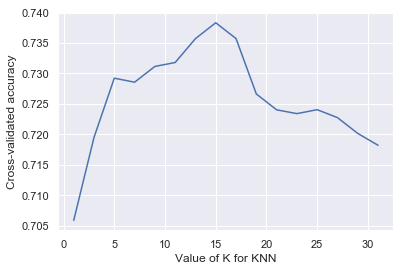

In [256]:
X = df_zscore.loc[:,]
y = df2[57]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

# 5-fold cross-validation with k = [1, 3, 5, 7, 31] for KNN (the n_neighbors parameter)
k = list(range(1,32,2))
k_scores = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print("For k= {}, Accuracies: {}".format(i, scores))
    

print('\n')
print('Mean of accuracy scores:', k_scores)
print('\n')
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

plt.plot(k, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
# plt.title('')
plt.savefig(os.path.join('2-2-a-kNN.png'), dpi=300, format='png', bbox_inches='tight')



#ref: https://www.ritchieng.com/machine-learning-cross-validation/

# b) SVM (RBF Kernel)

In [257]:
model = SVC()
param_grid = {'C': [0.1, 0.5, 1, 2, 5,10, 20, 50], 'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}
grid = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5,refit=True)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [ ]:
#SVM GATHER DATA
rbf_svc = SVC(kernel='rbf', gamma=0.01, C=10,probability=True).fit(X_train,y_train)

#PREDICT PROBABILITY SCORE = 2D ARRAY FOR EACH PREDICTION
predictedprobSVC = rbf_svc.predict_proba(X_test)

#GET ROC DATA
fpr, tpr, thresholds = roc_curve(y_test, predictedprobSVC[:,1])
roc_auc = auc(fpr, tpr)

#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#plt.xlim([0.0, 1.0]
#plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.savefig(os.path.join('2-2-b-svm.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

#ref :https://medium.com/datadriveninvestor/computing-an-roc-graph-with-python-a3aa20b9a3fb

# 3. Training classifiers and reporting the results:

# a) Classifying the test set using k-NN, SVM, Random Forests, and Neural Network

In [ ]:
X = df_zscore.loc[:,]
y = df2[57]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

Knn and SVM with chosen parameters from part 2

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', gamma=0.01, C=10,random_state=42)

In [ ]:
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

In [ ]:
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)

In [ ]:
print("Classification Report for k-NN:")
print("Accuracy is ", accuracy_score(y_test,knn_pred)*100)
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

print("Classification Report for SVM:")
print("Accuracy is ", accuracy_score(y_test,svm_pred)*100)
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

Random Forest and Neural Network classifiers with default parameters

In [ ]:
rfc = RandomForestClassifier(random_state=42)
nn_mlp = MLPClassifier(random_state=42)

In [ ]:
rfc.fit(X_train, y_train)
nn_mlp.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)
nn_mlp_pred = nn_mlp.predict(X_test)

In [ ]:
print("Classification Report for Random Forests: ")
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

print("Classification Report for Neural Network:")
print("Accuracy is ", accuracy_score(y_test,nn_mlp_pred)*100)
print(confusion_matrix(y_test,nn_mlp_pred))
print(classification_report(y_test,nn_mlp_pred))


# b) Exploring parameters for Random Forest and Neural Network

Random Forests

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rfc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

    
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.title('AUC plot for RF')
plt.savefig(os.path.join('2-3-b-rf(n_estimator).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
# Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_estimators=25, n_jobs=-1, random_state=42)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title('AUC plot for RF')
plt.savefig(os.path.join('2-3-b-rf(Treedepth).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

#Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

In [ ]:
rfc_tuned = RandomForestClassifier(n_estimators=100,random_state=42, max_depth=13)

In [ ]:
rfc_tuned = rfc_tuned.fit(X_train, y_train)
rfc_tuned_pred = rfc_tuned.predict(X_test)

In [ ]:
print("Results from the default parameters for Random forests:")
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))
print('\n')
print("Results from the tuned parameters for Random forests:")
print("Accuracy is ", accuracy_score(y_test,rfc_tuned_pred)*100)
print(confusion_matrix(y_test,rfc_tuned_pred))
print(classification_report(y_test,rfc_tuned_pred))

### Neural Network

In [ ]:
nn_mlp = MLPClassifier(random_state=42)
nn_mlp.fit(X_train, y_train)
nn_mlp_pred = nn_mlp.predict(X_test)

In [ ]:
parameter_space = {
    'max_iter': [2000],
    'hidden_layer_sizes': [(57,57,57), (57,57),(57,30,10)], # (57,57,30,20,5)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'random_state': [42],
    'batch_size': [70, 200]
}

In [ ]:
nn_mlp_tuned = GridSearchCV(nn_mlp, parameter_space, n_jobs=-1, cv=5, refit=True)
nn_mlp_tuned.fit(X_train, y_train)

In [ ]:
# Best parameter set
print('Best parameters found:\n', nn_mlp_tuned.best_params_)

In [ ]:
nn_mlp_tuned1 = MLPClassifier(activation = nn_mlp_tuned.best_params_['activation'],
                       alpha = nn_mlp_tuned.best_params_['alpha'], 
#                        learning_rate= nn_mlp_tuned.best_params_['learning_rate'], 
                       solver = nn_mlp_tuned.best_params_['solver'], 
                       random_state = nn_mlp_tuned.best_params_['random_state'], 
                       hidden_layer_sizes = nn_mlp_tuned.best_params_['hidden_layer_sizes'],
                       batch_size = nn_mlp_tuned.best_params_['batch_size'],
                       max_iter = nn_mlp_tuned.best_params_['max_iter'],
#                        early_stopping = True,
                             )
print(nn_mlp_tuned1)

nn_mlp_tuned1.fit(X_train, y_train)
y_true, y_pred = y_test, nn_mlp_tuned1.predict(X_test)

print("Results from the default parameters for the neural network:")
print("Accuracy is ", accuracy_score(y_test,nn_mlp_pred)*100)
print(confusion_matrix(y_test,nn_mlp_pred))
print(classification_report(y_test,nn_mlp_pred))
print("\n")
print("Results from the tunned parameters for the neural network:")
print("Accuracy is ", accuracy_score(y_true,y_pred)*100)
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))

In [ ]:
plt.plot(nn_mlp_tuned1.loss_curve_)

# C) Varying the split of the training-test set

In [ ]:
from sklearn.model_selection import KFold
import time

def cross_validate_model(X, y, clf, n_splits):
    #define 10-fold cross validation test harness
    kfold = KFold(n_splits=n_splits, shuffle=True)
    results = []
    count = 1
    for _ in range(20):
        for train, test in kfold.split(X, y):
            count += 1
            
            
            t0 = time.time()
            model = clf.fit(X[train], y[train])
            t1 = time.time()
            y_pred = model.predict(X[test])
            t2 = time.time()

            classification_time = round(t2-t1, 3) # Classification time rounded to 3 decimal in seconds
            training_time = round(t1-t0, 3) # Classification time rounded to 3 decimal in seconds
            precision,recall,fscore,support = score( y[test],y_pred,average='macro')
            accuracy = accuracy_score(y[test],y_pred)
            results.append([accuracy, precision, recall, fscore, support, training_time, classification_time, n_splits])
    
    result_data = pd.DataFrame(results)
    result_data.columns = ["accuracy", "precision", "recall", "fscore", "support", "training_time", "classification_time", "num_folds"]
    
    return result_data

### KNN Run Kfold for 4,5,6,7 folds 20 times each
#1

In [ ]:
np.random.seed(40)
knn = KNeighborsClassifier(n_neighbors=15)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, knn, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
data.groupby(['num_folds']).agg(f)

### SVM Run Kfold for 4,5,6,7 folds 20 times each
#2

In [ ]:
np.random.seed(40)
svm = SVC(kernel='rbf', gamma=0.01, C=10,random_state=42)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, svm, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
data.groupby(['num_folds']).agg(f)

### Random Forest Classifier Run Kfold for 4,5,6,7 folds 20 times each
**DEFAULT PARAMETERS** #3

In [ ]:
np.random.seed(40)
rfc = RandomForestClassifier(random_state=42)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, rfc, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Third classifier: Results from random forests(default parameters)")
data.groupby(['num_folds']).agg(f)

### Neural Network Classifier Run Kfold for 4,5,6,7 folds 20 times each
**DEFAULT PARAMETERS** #4

In [ ]:
np.random.seed(40)
nn_mlp = MLPClassifier(random_state=42)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, nn_mlp, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Third classifier: Results from random forests(default parameters)")
data.groupby(['num_folds']).agg(f)

### Random Forest Classifier Run Kfold for 4,5,6,7 folds 20 times each
**TUNED PARAMETERS** #5

In [ ]:
np.random.seed(40)
rfc_tuned = RandomForestClassifier(n_estimators=100,random_state=42, max_depth=13)
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, rfc_tuned, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Fifth classifier: Random Forest (tuned paramters)")
data.groupby(['num_folds']).agg(f)

### Neural Network Classifier Run Kfold for 4,5,6,7 folds 20 times each
**Tuned PARAMETERS** #6

In [ ]:
np.random.seed(40)
nn_mlp_tuned2 = MLPClassifier(activation = nn_mlp_tuned.best_params_['activation'],
                       alpha = nn_mlp_tuned.best_params_['alpha'], 
#                        learning_rate= nn_mlp_tuned.best_params_['learning_rate'], 
                       solver = nn_mlp_tuned.best_params_['solver'], 
                       random_state = nn_mlp_tuned.best_params_['random_state'], 
                       hidden_layer_sizes = nn_mlp_tuned.best_params_['hidden_layer_sizes'],
                       batch_size = nn_mlp_tuned.best_params_['batch_size'],
                       max_iter = nn_mlp_tuned.best_params_['max_iter'],
#                        early_stopping = True,
                             )
data = pd.DataFrame()
for n_folds in [4,5,6,7]:
    knn_result = cross_validate_model(X.values, y.values, nn_mlp_tuned2, n_folds)
    data = pd.concat([data, knn_result], ignore_index=True)

In [ ]:
f = {
    "accuracy": ['mean', 'std'], 
    "precision": ['mean', 'std'], 
    "recall": ['mean', 'std'], 
    "fscore": ['mean', 'std'], 
#     "support": ['mean', 'std'], 
    "training_time": ['mean', 'std'], 
    "classification_time": ['mean', 'std']
}
print("Sixth classifier: Neural Network (tuned paramter)")
data.groupby(['num_folds']).agg(f)